###Name: Ahamd Aljarf

###Mini Project: BigMart Outlet Sales

###Technocolabs Softwares 

###Batch: March 2023

###Problem Statement:

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly

###Loading Packages and Data:

Uploading the dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (1).csv
Saving Train.csv to Train (3).csv


Lets import the required libraries:



In [ ]:
import pandas as pd
import numpy as np
import io

df1 = pd.read_csv(io.BytesIO(uploaded['Train.csv'])).head(1000)

df1



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FDO34,17.700,Low Fat,0.050112,Snack Foods,165.9816,OUT010,1998,NaN,Tier 3,Grocery Store,167.7816
996,NCL30,18.100,Low Fat,0.048931,Household,127.3336,OUT035,2004,Small,Tier 2,Supermarket Type1,1150.5024
997,FDK28,5.695,Low Fat,0.065961,Frozen Foods,259.2646,OUT017,2007,NaN,Tier 2,Supermarket Type1,9275.9256
998,DRJ39,20.250,Low Fat,0.036319,Dairy,219.3482,OUT035,2004,Small,Tier 2,Supermarket Type1,5038.1086


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['Test.csv'])).head(1000)
df2


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
995,FDK52,18.250,Low Fat,0.079219,Frozen Foods,227.0062,OUT046,1997,Small,Tier 1,Supermarket Type1
996,FDA02,14.000,reg,0.029891,Dairy,146.3786,OUT017,2007,NaN,Tier 2,Supermarket Type1
997,FDM56,16.700,Low Fat,0.070301,Fruits and Vegetables,109.3912,OUT049,1999,Medium,Tier 1,Supermarket Type1
998,FDE57,9.600,LF,0.036278,Fruits and Vegetables,141.4154,OUT035,2004,Small,Tier 2,Supermarket Type1


###Data Structure and Content:


In [ ]:
df1.shape

(1000, 12)

In [ ]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df1.info

<bound method DataFrame.info of     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0             FDA15        9.300          Low Fat         0.016047   
1             DRC01        5.920          Regular         0.019278   
2             FDN15       17.500          Low Fat         0.016760   
3             FDX07       19.200          Regular         0.000000   
4             NCD19        8.930          Low Fat         0.000000   
..              ...          ...              ...              ...   
995           FDO34       17.700          Low Fat         0.050112   
996           NCL30       18.100          Low Fat         0.048931   
997           FDK28        5.695          Low Fat         0.065961   
998           DRJ39       20.250          Low Fat         0.036319   
999           NCP06          NaN          Low Fat         0.039056   

                 Item_Type  Item_MRP Outlet_Identifier  \
0                    Dairy  249.8092            OUT049   
1          

###Exploratory Data Analysis:

EDA Outliers:

In [ ]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,814.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,13.032138,0.066694,138.100303,1997.389000,2190.633137
std,4.724259,0.052238,62.152665,8.417989,1758.717873
min,4.610000,0.000000,31.290000,1985.000000,33.290000
25%,8.801250,0.026658,90.055400,1987.000000,807.116050
50%,13.000000,0.054691,140.099600,1999.000000,1757.712000
75%,17.250000,0.095443,182.662750,2004.000000,3087.314600
max,21.350000,0.328391,265.222600,2009.000000,9275.925600


In [ ]:
df1.isna().sum()

Item_Identifier                0
Item_Weight                  186
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  284
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [ ]:
df1.isnull().sum()

Item_Identifier                0
Item_Weight                  186
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  284
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [ ]:
corr=df1.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020027,0.052249,-0.013017,0.013830
Item_Visibility,-0.020027,1.000000,0.012226,-0.114948,-0.093142
Item_MRP,0.052249,0.012226,1.000000,0.055565,0.581664
Outlet_Establishment_Year,-0.013017,-0.114948,0.055565,1.000000,-0.024841
Item_Outlet_Sales,0.013830,-0.093142,0.581664,-0.024841,1.000000


In [ ]:
df1.duplicated().sum()

0

In [ ]:
corr=df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020027,0.052249,-0.013017,0.013830
Item_Visibility,-0.020027,1.000000,0.012226,-0.114948,-0.093142
Item_MRP,0.052249,0.012226,1.000000,0.055565,0.581664
Outlet_Establishment_Year,-0.013017,-0.114948,0.055565,1.000000,-0.024841
Item_Outlet_Sales,0.013830,-0.093142,0.581664,-0.024841,1.000000


###Univariate Analysis:

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

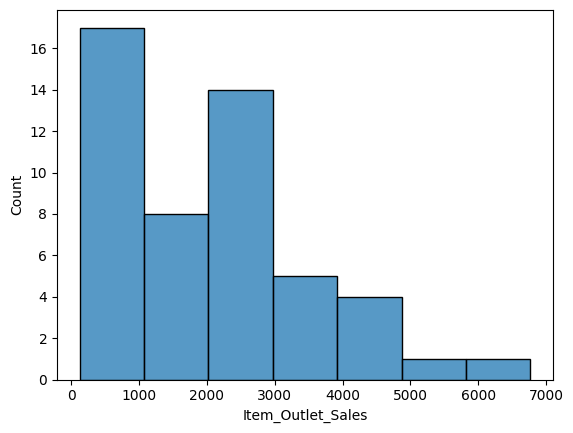

In [ ]:
import seaborn as sns

sns.histplot(df1['Item_Outlet_Sales'].head(50))

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

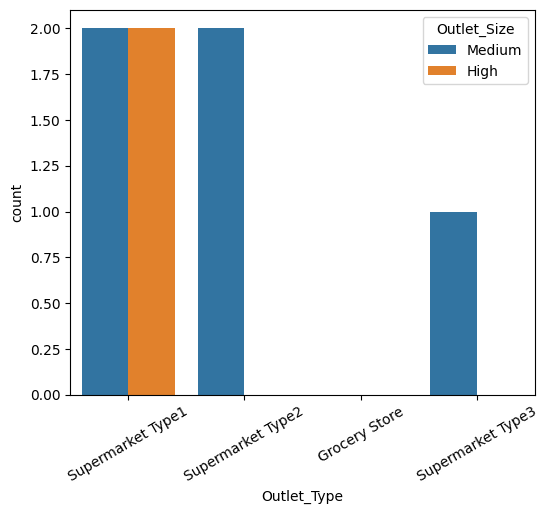

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,5))
chart = sns.countplot(
    data=df1.head(10),
    x='Outlet_Type',hue='Outlet_Size'
    
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

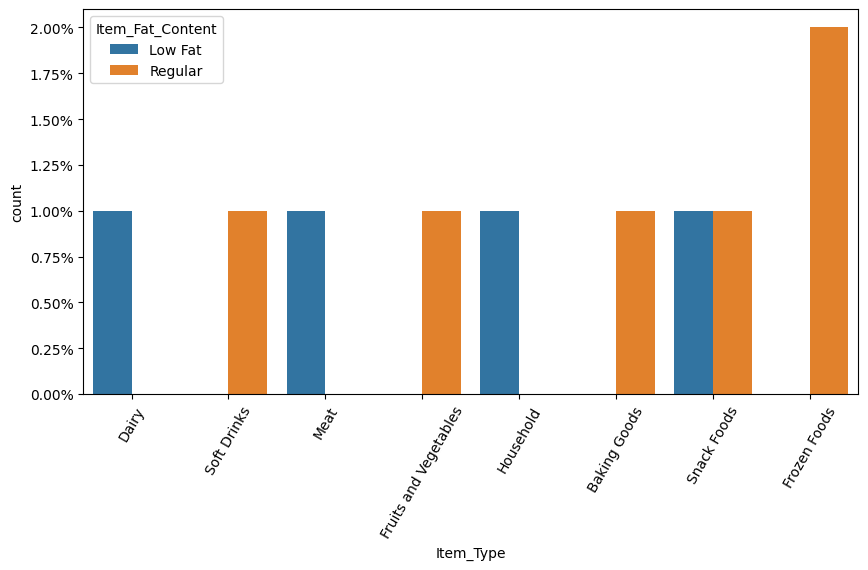

In [ ]:
import matplotlib.ticker as mtick


plt.figure(figsize=(10,5))
chart = sns.countplot( data=df1.head(10),
    x='Item_Type',hue='Item_Fat_Content')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

chart.yaxis.set_major_formatter(mtick.PercentFormatter())

###Bivariate Analysis:

In [ ]:
pie1 = df1.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
pie1 = pie1.div(pie1.sum().astype(float)).round(2)*100
pie1

Outlet_Type
Grocery Store         2.0
Supermarket Type1    69.0
Supermarket Type2     9.0
Supermarket Type3    20.0
Name: Item_Outlet_Sales, dtype: float64

<Axes: title={'center': 'Item Outlet Sales Grouped by Outlet Type'}, ylabel='Outlet Type'>

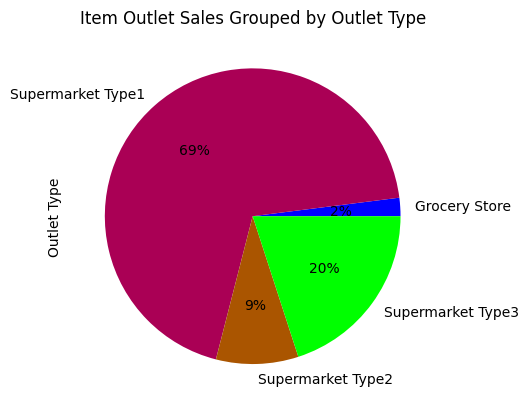

In [ ]:
pie1.plot.pie(label=('Outlet Type'), title = "Item Outlet Sales Grouped by Outlet Type",colormap='brg', autopct='%1.0f%%') 

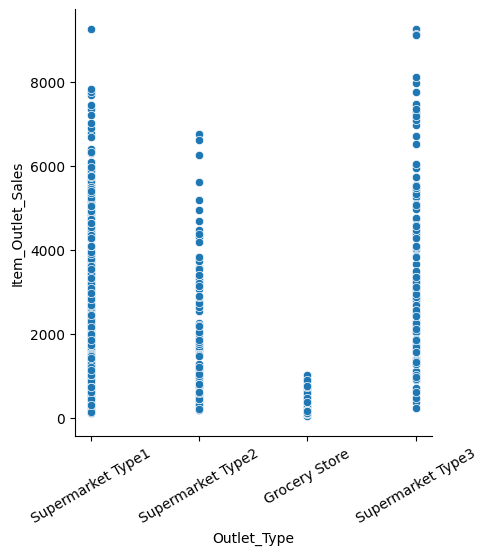

In [ ]:
chart=sns.relplot(data=df1, x='Outlet_Type' , y='Item_Outlet_Sales')
chart.set_xticklabels(rotation=30)


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

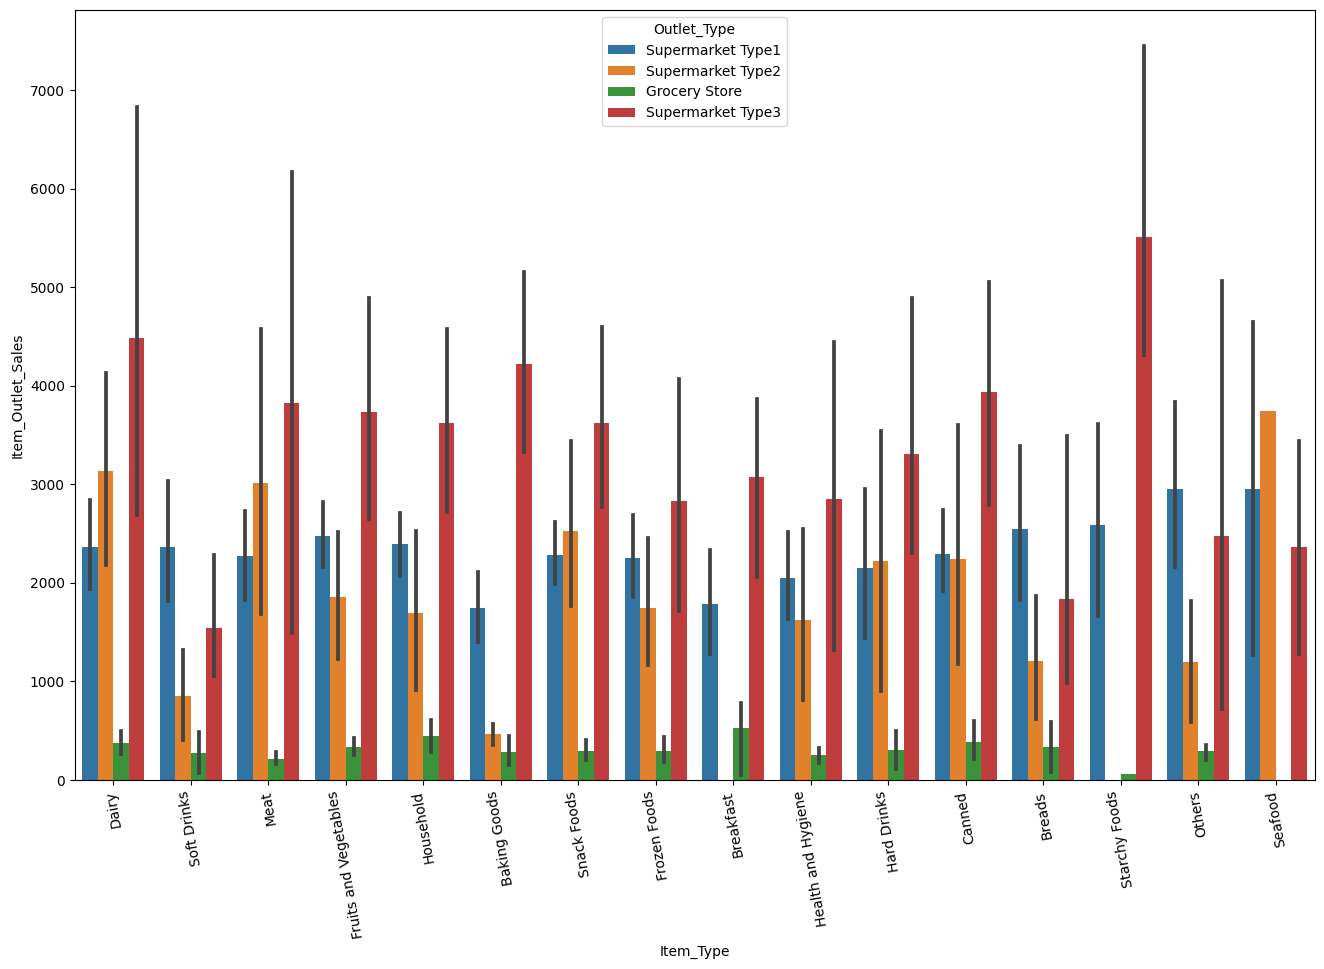

In [ ]:
plt.figure(figsize=(16,10))
chart=sns.barplot(data=df1, x='Item_Type' , y='Item_Outlet_Sales' , hue='Outlet_Type')
chart.set_xticklabels(chart.get_xticklabels(),rotation=100)

###Missing Value Treatment:

In [ ]:
df1=df1.fillna(0)
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FDO34,17.700,Low Fat,0.050112,Snack Foods,165.9816,OUT010,1998,0,Tier 3,Grocery Store,167.7816
996,NCL30,18.100,Low Fat,0.048931,Household,127.3336,OUT035,2004,Small,Tier 2,Supermarket Type1,1150.5024
997,FDK28,5.695,Low Fat,0.065961,Frozen Foods,259.2646,OUT017,2007,0,Tier 2,Supermarket Type1,9275.9256
998,DRJ39,20.250,Low Fat,0.036319,Dairy,219.3482,OUT035,2004,Small,Tier 2,Supermarket Type1,5038.1086


In [ ]:
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Feature Engineering:

Lets assign attributes and lables:

In [ ]:
import numpy as np

In [ ]:
X= df1.iloc[:,:-1].values.astype(str)
y = df1.iloc[:,-1].values # labels


print(X.shape, y.shape)
  #  labels (outputs)

(1000, 11) (1000,)


In [ ]:
y

array([3735.138 ,  443.4228, 2097.27  ,  732.38  ,  994.7052,  556.6088,
        343.5528, 4022.7636, 1076.5986, 4710.535 , 1516.0266, 2187.153 ,
       1589.2646, 2145.2076, 1977.426 , 1547.3192, 1621.8888,  718.3982,
       2303.668 , 2748.4224, 3775.086 , 4064.0432, 1587.2672,  214.3876,
       4078.025 ,  838.908 , 1065.28  ,  308.9312,  178.4344,  125.8362,
        163.7868, 2741.7644, 3068.0064, 2174.5028, 2085.2856, 3791.0652,
       2797.6916, 1609.9044,  388.1614, 2180.495 , 3435.528 , 2150.534 ,
       2527.3768, 6768.5228,  373.5138,  358.2004, 2428.8384, 5815.0972,
       2576.646 ,  780.3176, 3134.5864,  850.8924,  810.9444, 3121.2704,
       4815.0656, 6258.52  , 2117.244 ,  796.9626, 4910.275 ,  892.172 ,
       3185.1872, 1062.6168,  484.7024,  147.8076, 2543.356 ,  184.4266,
       4865.6664, 1118.544 , 2302.3364, 2027.361 , 3435.528 ,  599.22  ,
       4604.6728, 2285.0256, 5580.7356, 2290.352 , 1207.0954,  643.1628,
       1587.933 , 5305.0944, 1697.79  , 1427.4752, 

###Applying Preprocessing technique:

One hot encoder:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X2= OneHotEncoder().fit_transform(X).toarray()
X2.shape

(1000, 2977)

In [ ]:
y.dtype

dtype('float64')

###Splitting the data into traninig and testing set:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size=0.20 , random_state=101 )

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2977) (200, 2977) (800,) (200,)


###Training the Linear Regression model:

In [ ]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

In [ ]:
linreg.fit(X_train,y_train)


LinearRegression()

Making predictions using linear regression:

In [ ]:
y_pred=linreg.predict(X_test)
y_pred

array([ 180.06492089, 2525.08206368, 1616.25350517, 3572.12387264,
       3582.8971332 , 2016.92467441, 3511.60031751, 1968.06867726,
       1560.34587916, 2294.59578335, 3136.8098756 , 2713.24259745,
        554.69492184, 1950.81492905, 2110.45477976, 3780.50199693,
       1398.98574477, 2242.26273965, 3479.24513365, 1242.89505968,
       2315.06559172, 1875.75690342, 2658.26641025, 2152.07758258,
       2073.86392181,  387.26764176, 2396.82216741, 1555.15409741,
       2263.89868267, 2310.96329261, 3674.55501553, 3808.15511018,
       2063.7867821 , 2298.13258957, 1855.2124427 , 2179.64293935,
       1971.76095967, 3308.05828778, 2022.14454936, 3300.80479133,
          7.18857402, 2242.38592392, 2431.15196905, 3055.37109063,
       2065.85274656,  185.50122848, 3454.3609396 ,   62.64720567,
       2325.68277452, 2129.3012693 , 1930.9501869 , 3557.63735442,
       1235.71931042, 1707.29068905, 3387.32430605, 3039.96089322,
       2661.63696447, 1870.34917238, 2885.49223464, 1560.52385

In [ ]:
({'Actual': y_test})

{'Actual': array([ 319.584 ,  942.7728,  812.276 , 5063.409 , 5070.7328,  489.363 ,
        3440.8544, 1707.777 ,  331.5684, 5770.4886, 1380.8692, 1506.0396,
         258.3304,  539.298 , 1565.9616, 4414.254 , 2085.9514, 2364.9216,
        3068.0064, 2516.724 , 3211.8192, 1270.3464, 3195.84  , 1221.0772,
        1039.9796,  213.056 , 2097.27  , 2117.244 , 1890.2062, 2665.8632,
        2797.6916,  521.3214, 1969.4364, 2812.3392, 1253.7014,  876.1928,
        2863.6058,  535.3032, 1155.8288, 6976.2524,  291.6204, 3275.736 ,
         314.2576, 3866.9664, 2336.958 ,  263.6568, 9275.9256,  189.753 ,
        4993.5   , 1853.5872, 1414.1592, 7370.406 , 4843.695 , 1504.708 ,
        4022.7636, 6258.52  , 3147.9024, 4098.6648, 1794.331 ,  585.904 ,
        1318.284 , 5580.7356,  147.1418, 4093.3384, 3079.9908,  239.688 ,
        3315.684 , 2956.152 , 5262.4832, 1867.569 , 1288.9888, 2133.2232,
        5182.5872, 1649.8524, 3067.3406, 1805.6496, 2251.7356, 6093.4016,
        3735.138 , 2416.854 

In [ ]:
({'Predicted': y_pred})

{'Predicted': array([ 180.06492089, 2525.08206368, 1616.25350517, 3572.12387264,
        3582.8971332 , 2016.92467441, 3511.60031751, 1968.06867726,
        1560.34587916, 2294.59578335, 3136.8098756 , 2713.24259745,
         554.69492184, 1950.81492905, 2110.45477976, 3780.50199693,
        1398.98574477, 2242.26273965, 3479.24513365, 1242.89505968,
        2315.06559172, 1875.75690342, 2658.26641025, 2152.07758258,
        2073.86392181,  387.26764176, 2396.82216741, 1555.15409741,
        2263.89868267, 2310.96329261, 3674.55501553, 3808.15511018,
        2063.7867821 , 2298.13258957, 1855.2124427 , 2179.64293935,
        1971.76095967, 3308.05828778, 2022.14454936, 3300.80479133,
           7.18857402, 2242.38592392, 2431.15196905, 3055.37109063,
        2065.85274656,  185.50122848, 3454.3609396 ,   62.64720567,
        2325.68277452, 2129.3012693 , 1930.9501869 , 3557.63735442,
        1235.71931042, 1707.29068905, 3387.32430605, 3039.96089322,
        2661.63696447, 1870.3491723

In [ ]:
import math  # rounding the prediction values 
import numpy as np
rounded = [np.round(y_pred,2)]
rounded

[array([ 180.06, 2525.08, 1616.25, 3572.12, 3582.9 , 2016.92, 3511.6 ,
        1968.07, 1560.35, 2294.6 , 3136.81, 2713.24,  554.69, 1950.81,
        2110.45, 3780.5 , 1398.99, 2242.26, 3479.25, 1242.9 , 2315.07,
        1875.76, 2658.27, 2152.08, 2073.86,  387.27, 2396.82, 1555.15,
        2263.9 , 2310.96, 3674.56, 3808.16, 2063.79, 2298.13, 1855.21,
        2179.64, 1971.76, 3308.06, 2022.14, 3300.8 ,    7.19, 2242.39,
        2431.15, 3055.37, 2065.85,  185.5 , 3454.36,   62.65, 2325.68,
        2129.3 , 1930.95, 3557.64, 1235.72, 1707.29, 3387.32, 3039.96,
        2661.64, 1870.35, 2885.49, 1560.52, 3268.65, 2510.59,  529.98,
        2100.88, 4027.53, -197.67, 5238.27, 2180.58, 2107.95, 2348.07,
        3236.76, 2529.01, 2134.35, 2072.56, 2480.78, 1756.21, 3502.63,
        2611.9 , 4261.5 , 3202.97, 1932.09, 1616.01, 2286.77, 2337.71,
        2937.55, 1943.38, 3300.84, 2066.33, 3606.47, 2445.14, 3611.78,
        3214.53, 2069.25, 2883.07, 2076.53, 2080.03, 2327.8 , 1563.44,
      

Linear regression evaluation: 

In [ ]:
from sklearn.metrics import r2_score 

# R2(coefficient of determination) regression score function.

# R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale

print(" R2 score of linear regression: ", r2_score(y_test, y_pred))

 R2 score of linear regression:  0.2706038364629223


In [ ]:
from sklearn.metrics import mean_absolute_error as MAE

print('sklearn MAE = ', MAE(y_test, y_pred))

sklearn MAE =  1181.7178231266082


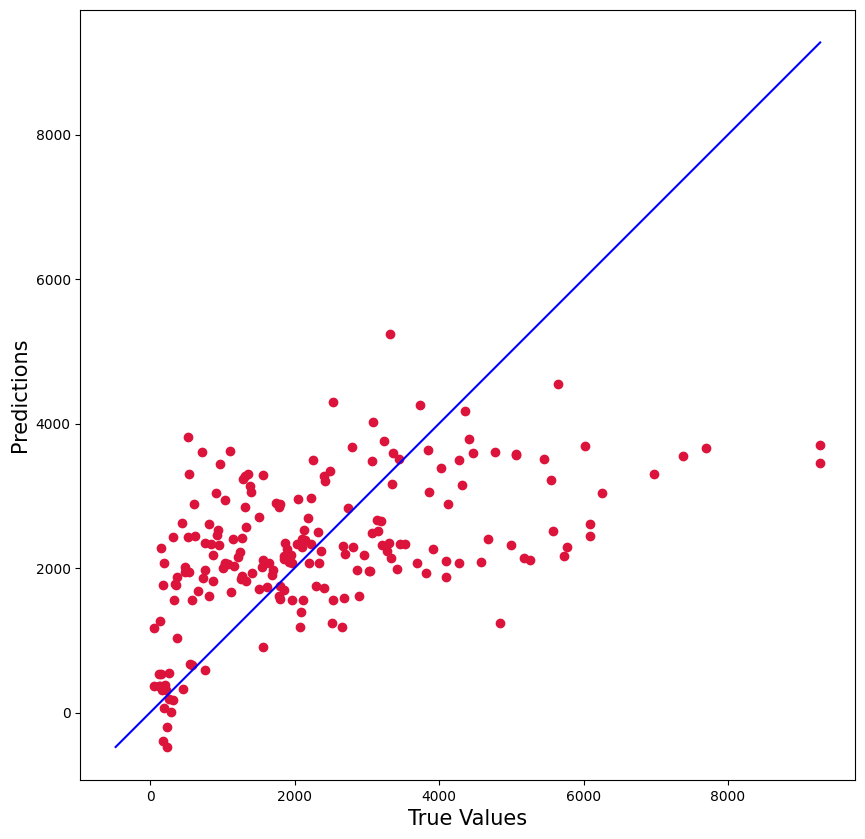

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred ,c='crimson') 
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


###Regularized Linear Regression:

Lets split the data and scaling the features:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X2)


StandardScaler()

In [ ]:
X3 = scaler.transform(X2)

X3


array([[-0.0316386 , -0.0316386 , -0.0548546 , ...,  0.7257531 ,
        -0.32587527, -0.37796447],
       [-0.0316386 , -0.0316386 , -0.0548546 , ..., -1.37787907,
         3.06865877, -0.37796447],
       [-0.0316386 , -0.0316386 , -0.0548546 , ...,  0.7257531 ,
        -0.32587527, -0.37796447],
       ...,
       [-0.0316386 , -0.0316386 , -0.0548546 , ...,  0.7257531 ,
        -0.32587527, -0.37796447],
       [-0.0316386 , -0.0316386 , -0.0548546 , ...,  0.7257531 ,
        -0.32587527, -0.37796447],
       [-0.0316386 , -0.0316386 , -0.0548546 , ..., -1.37787907,
        -0.32587527,  2.64575131]])

In [ ]:
scaledX_train, scaledX_test, y_train2, y_test2 = train_test_split(X3, y, test_size=0.20) 

Lets train the model:

In [233]:
rlreg = Lasso(alpha=1)
rlreg.fit(scaledX_train, y_train)


Lasso(alpha=1)

Model predictions:

In [234]:
y_pred2=rlreg.predict(scaledX_test)

y_pred2

array([1728.79672235, 1717.50183003, 1787.65475955, 1717.50183003,
        801.3311198 , 1787.65475955, 1666.66959375, 1918.99382067,
       1375.10110142, 1713.47628094, 1787.65475955, 1375.10110142,
       1787.65475955, 1666.66959375, 1787.65475955, 1787.65475955,
       1717.50183003, 1787.65475955, 1798.94965187, 1787.65475955,
       1787.65475955, 1717.50183003, 2779.25430586, 1787.65475955,
       1798.94965187, 1798.94965187, 1923.9949671 , 1787.65475955,
       1693.66541711,  825.6662031 , 1787.65475955, 1375.10110142,
       1798.94965187, 1787.65475955, 1787.65475955, 1666.66959375,
       1787.65475955, 1798.94965187, 1787.65475955, 3453.42466778,
       1787.65475955, 1787.65475955, 1787.65475955, 1787.65475955,
       1085.50928976, 1787.65475955, 1787.65475955, 2081.6023132 ,
       1713.47628094, 1787.65475955, 1787.65475955, 1728.79672235,
       1787.65475955, 1787.65475955, 1787.65475955, 1592.49111513,
       1375.10110142, 1151.45968245, 1798.94965187, 1232.81407

Model evaluation:

In [236]:
from sklearn.metrics import r2_score 


print(" R2 score of linear regression: ", r2_score(y_test, y_pred2))

 R2 score of linear regression:  -0.11595695683677265


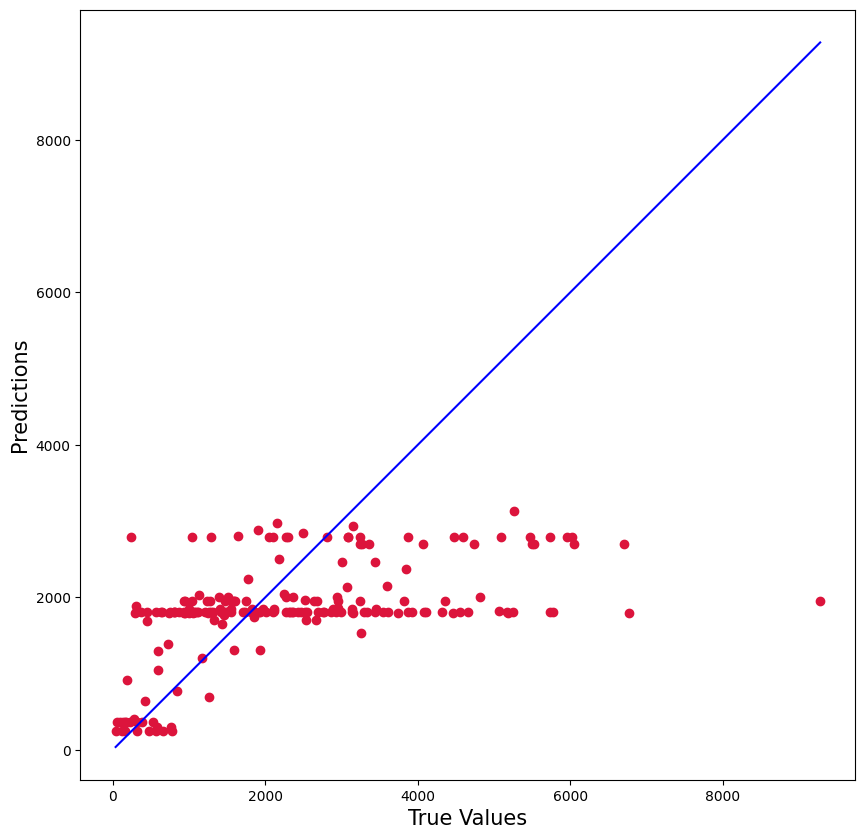

In [209]:
plt.figure(figsize=(10,10))
plt.scatter(y_test2, y_pred2 ,c='crimson') 
p1 = max(max(y_pred2), max(y_test2))
p2 = min(min(y_pred2), min(y_test2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

###Random Forest:


In [217]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor()  
Rf.fit(X_train, y_train.astype('int'))
  


array([ 225.53, 1669.21, 1144.85, 1840.78, 2194.78, 1074.14, 1286.64,
       1096.8 , 1497.46, 1230.24, 2894.89, 2205.8 ,  177.77,  808.03,
       1724.09, 2281.44, 2563.5 , 1279.59, 2598.82, 1016.52, 1114.59,
       1207.89, 1678.98, 1216.74, 1349.95,  234.36, 1062.27, 1387.22,
       1095.37, 1591.24, 2594.58, 2544.84, 1646.78, 1577.58, 1507.16,
       1531.5 , 1116.16, 2193.  ,  983.17, 2770.  ,  169.33, 1068.26,
       1145.25, 2757.39, 1265.96,  266.65, 2587.95,  205.57, 1097.68,
       1947.85, 1161.91, 2535.37, 1433.62, 1289.82, 2532.03, 2090.4 ,
       2377.07, 1143.16, 1570.99, 1536.66, 2281.44, 1556.43,  118.27,
       1261.19, 2669.62,  190.23, 3817.42, 1546.08, 1440.99, 1185.15,
       1810.85, 2129.36, 1354.06, 2210.86, 1754.75, 1196.92, 3405.28,
       1399.81, 2324.94, 2406.38, 1818.54, 1261.7 , 1558.47, 1199.75,
       1357.7 , 1157.3 , 2770.  , 1388.45, 2194.78, 1591.24, 3708.76,
       2194.78, 1262.88, 1844.02, 1486.59, 1416.06,  989.04, 1048.83,
       1351.19,  856

In [222]:
# performing predictions on the test dataset
y_pred3 = Rf.predict(scaledX_test)
y_pred3

array([1669.21, 1869.37, 2425.66, 2204.81, 1144.85, 5265.41, 2328.47,
       2598.82, 1644.13, 1130.64, 1544.26, 3485.74, 2880.55,  768.69,
       2517.93, 1794.21, 1108.66, 2336.92, 1354.5 , 1350.48, 1116.16,
       1502.14, 1779.4 , 4867.58,  492.74,  127.28, 2661.88, 2390.91,
       1810.85, 1635.11,  828.55,  570.24,  858.67, 1923.5 , 1450.85,
       1279.62,  992.63,  899.79, 1924.28, 1110.42, 1016.46, 2394.42,
       2213.33, 2431.25, 1818.54, 2304.77,  150.35,  662.65, 1757.93,
       2885.8 , 2736.5 , 1563.23, 1992.25,  179.68, 1604.76, 2101.85,
       2819.57, 1373.62, 1662.28, 2506.27, 4799.54, 5189.74, 1507.02,
       4185.52, 1765.43, 1461.38,  362.28, 1086.43, 1293.16, 1473.3 ,
       2725.69, 2075.21, 1178.36,  273.12,  609.21,  160.22, 1191.07,
       2894.89,  156.46, 3405.28, 3090.97, 1646.78,  239.  , 1016.52,
       3784.31, 3850.51, 3847.37, 2166.31,  293.99,  218.57, 2757.39,
       2149.78, 1210.05, 2706.86, 1972.49, 1275.71,  225.53, 4504.31,
       2695.79, 2669

In [224]:
print(" R2 score of random forest: ", r2_score(y_test2, y_pred3))

 R2 score of random forest:  0.632869622548141


In [211]:
from sklearn.metrics import mean_squared_error # mse will be used for evaluation because it is a continous data

mse = mean_squared_error(y_test, y_pred3)

mse


4902102.351813367

In [212]:

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred3))

rmse

2214.0691840620893